# Modeling Notebook
## The goals of this notebook are the following:
## Use feature selection techniques to determine final features for model
## Build interpretable model with a certain level of accuracy for a Pitcher's season strikeout numbers

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")


Bad key "text.kerning_factor" on line 4 in
/Users/joseramirez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Reading in dataset

df=pd.read_csv('Cleanpitcherdataset.csv')

In [3]:
# Dropping unnecessary columns

df.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [4]:
df.columns

Index(['Name', 'Age', 'Lev', 'Tm', 'GS', 'IP', 'H', 'BB', 'SO', 'HR', 'HBP',
       'ERA', '2B', '3B', 'Pit', 'Str', 'LD', 'PU', 'BAbip', 'Season', 'WAR',
       'Balls', 'Pitches', 'BABIP', 'LOB%', 'FIP', 'LD%', 'GB%', 'FB%', 'FBv',
       'SL%', 'SLv', 'CB%', 'CBv', 'CH%', 'CHv', 'wFB', 'wSL', 'wCB', 'wCH',
       'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%',
       'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Soft%', 'Med%', 'Hard%',
       'Best_Pitch', '95mph+', 'O-Swing%_Elite', 'FStrike_elite',
       'Fstrikeelite_95mph+', 'CH', 'FB', 'SL'],
      dtype='object')

In [5]:
df.dtypes

Name                    object
Age                      int64
Lev                     object
Tm                      object
GS                       int64
IP                     float64
H                        int64
BB                       int64
SO                       int64
HR                       int64
HBP                      int64
ERA                    float64
2B                       int64
3B                       int64
Pit                      int64
Str                    float64
LD                     float64
PU                     float64
BAbip                  float64
Season                   int64
WAR                    float64
Balls                  float64
Pitches                float64
BABIP                  float64
LOB%                   float64
FIP                    float64
LD%                    float64
GB%                    float64
FB%                    float64
FBv                    float64
SL%                    float64
SLv                    float64
CB%     

In [6]:
# Checking shape of dataframe

df.shape 

(1198, 60)

In [7]:
# Checking to see if there are nulls

df.isna().any().sum() 

0

In [8]:
df_features=df[df.Season!=2019] #using only 2014-2018 for training and testing

In [9]:
df_features.drop(axis=1,labels=['Name','Lev','Tm','Best_Pitch','SO'],inplace=True)

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df_features.shape

(999, 55)

In [11]:
target=df.loc[df.Season!=2019,'SO'] #target variable Strikeouts 2014-2018

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [14]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape) 
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (799, 55) Target:  (799,)
Training set - Features:  (200, 55) Target:  (200,)


## Basic Linear Regression Modeling

In [15]:
lm_basic = LinearRegression() #basic linear model with no feature selection
lm_basic = lm_basic.fit(X_train, y_train)
print(lm_basic.intercept_)
print(lm_basic.coef_)

117.65707133917391
[ 2.98769901e-01 -3.76206542e+00  3.04427313e+01 -4.17064916e+01
  6.27858191e+00  1.60376561e+01  8.29536221e-01  2.87981025e+00
 -1.48440516e+00 -4.58771190e-01  3.86313972e+01 -1.58265900e+00
  1.33526236e-01 -1.68994410e+00  5.02901492e+00 -2.27772180e+00
  1.69521963e+01 -5.07484411e+01  4.61182706e+01  3.91755415e+00
  1.37444522e+00 -7.36547703e+00 -5.59106469e-01 -7.25501989e-01
  5.95189719e-01 -1.45696583e-01 -2.69839760e-01 -9.14540304e-02
  3.64620423e-02 -2.57447825e-01 -7.19278458e-01  1.35519942e+00
 -3.23176697e+00 -6.70132150e-01 -9.24038517e-01 -1.88438402e+00
 -3.72247110e+00 -1.23728205e+00 -4.41784989e-01  1.19308981e+00
  2.58927242e+00 -5.57949027e+00 -2.34607212e+00  3.13052459e-01
  4.37062505e+00  1.74437745e+01  2.58169739e+01  3.04403359e+01
 -1.90396311e-01 -3.48951134e-01  1.06712946e-01  1.50492127e-01
  2.03235463e-01  2.30171528e-01 -5.87486944e-01]


In [16]:
print ("R^2 Score:", lm_basic.score(X_train, y_train)) #training R squared

R^2 Score: 0.9829242700536219


In [17]:
y_train_pred = lm_basic.predict(X_train) 

In [18]:
print ("R^2 Score:", lm_basic.score(X_test, y_test)) #test R squared

R^2 Score: 0.9701556144462419


In [19]:

from sklearn import metrics

train_mae = metrics.mean_absolute_error((y_train), (y_train_pred))
train_mse = metrics.mean_squared_error((y_train), (y_train_pred))
train_rmse = np.sqrt(metrics.mean_squared_error((y_train), (y_train_pred)))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 5.727804195490672
Mean Squared Error: 52.32161884000457
Root Mean Squared Error: 7.233368429715479


In [20]:
y_pred = lm_basic.predict(X_test)
test_mae = metrics.mean_absolute_error((y_test), (y_pred))
test_mse = metrics.mean_squared_error((y_test), (y_pred))
test_rmse = np.sqrt(metrics.mean_squared_error((y_test), (y_pred)))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)



Mean Absolute Error: 6.107268563008137
Mean Squared Error: 74.78760608750117
Root Mean Squared Error: 8.647982775624682


In [21]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  7 vs. Testing:  8


# Recursive Feature Elimination Model 

In [22]:
from sklearn.feature_selection import RFECV

In [23]:
ols = linear_model.LinearRegression()

In [24]:
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [25]:
selector.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [26]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [27]:
len(list(selected_rfe))

34

In [28]:
selected_rfe

Index(['GS', 'IP', 'H', 'BB', 'HR', 'HBP', 'ERA', '2B', 'Pit', 'Str', 'PU',
       'BAbip', 'Season', 'WAR', 'Balls', 'Pitches', 'BABIP', 'LOB%', 'FIP',
       'CH%', 'CHv', 'wFB', 'wCH', 'O-Swing%', 'Swing%', 'O-Contact%',
       'Z-Contact%', 'Contact%', 'Zone%', 'SwStr%', 'Soft%', 'Med%', 'Hard%',
       'SL'],
      dtype='object')

In [29]:
len(list(removed_rfe))

21

In [30]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])

trainRFE_mae = metrics.mean_absolute_error((y_train), (y_rfe))
trainRFE_mse = metrics.mean_squared_error((y_train), (y_rfe))
trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])
testRFE_mae = metrics.mean_absolute_error((y_test), (y_pred_rfe))
testRFE_mse = metrics.mean_squared_error((y_test), (y_pred_rfe))
testRFE_rmse = np.sqrt(metrics.mean_squared_error((y_test), (y_pred_rfe)))




In [31]:
print('Training Mean Absolute Error:', trainRFE_mae )
print('Training Mean Squared Error:',  trainRFE_mse)
print('Training Root Mean Squared Error:' , trainRFE_rmse)
print('Test Mean Absolute Error:', testRFE_mae )
print('Test Mean Squared Error:',  testRFE_mse)
print('Test Root Mean Squared Error:' , testRFE_rmse)

Training Mean Absolute Error: 5.789603739891552
Training Mean Squared Error: 53.555142558678696
Training Root Mean Squared Error: 7.318137916073917
Test Mean Absolute Error: 6.156571289473906
Test Mean Squared Error: 77.13931947874427
Test Root Mean Squared Error: 8.782899263839035


In [32]:
print ("R^2 Score train:", lm_rfe.score(X_train[selected_rfe], y_train))
print ("R^2 Score test:", lm_rfe.score(X_test[selected_rfe], y_test))

R^2 Score train: 0.9825216961583657
R^2 Score test: 0.9692171509115477


In [33]:
lm_rfe.coef_ #coefficients for features in model

array([ -3.62600432,  25.85180735, -39.96738961,   6.56261869,
        16.76504081,   0.79293351,   2.66830746,  -0.89713463,
        39.0296848 ,  -1.19678287,  -1.14579753,   4.94457759,
        -2.60397306,  16.4276848 , -51.02172541,  47.26078211,
         3.98555395,   1.25305524,  -7.05400818,  -0.84642286,
         1.07118295,  -1.76782614,  -1.23380131,  -2.43367986,
        -2.60438716,   1.25055683,   2.35460807,  -6.04304573,
        -1.44176096,   3.4141885 ,  18.24740188,  27.37602917,
        32.18045256,  -0.77075281])

# Select K Best Features Model

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=30)

selector.fit(X_train, y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7f93d0f605e0>)

In [35]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [36]:
list(removed_columns)

['Age',
 'LD',
 'PU',
 'BAbip',
 'Season',
 'BABIP',
 'LD%',
 'GB%',
 'FB%',
 'SL%',
 'SLv',
 'CB%',
 'CBv',
 'CH%',
 'Z-Swing%',
 'Zone%',
 'Soft%',
 'Med%',
 'Hard%',
 '95mph+',
 'FStrike_elite',
 'Fstrikeelite_95mph+',
 'CH',
 'FB',
 'SL']

In [37]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 8.45856789795153
Testing Root Mean Squared Error: 10.328862451795054


# Ridge Model 

In [50]:
from sklearn.linear_model import Ridge

In [55]:
clf = Ridge(alpha=1.0)
clf.fit(X_train[selected_rfe],y_train)

Ridge()

In [56]:
clf.coef_

array([ -3.94101185,  26.57348296, -36.38932432,   6.40532975,
        16.72465193,   0.89854591,   2.74872803,  -0.91013387,
        34.93518243,   1.6521295 ,  -1.11175381,   4.57873036,
        -2.74436403,  18.04580051, -31.4097423 ,  26.77498331,
         3.81879985,   1.26892314,  -6.15581282,  -1.13875536,
         1.10238065,  -1.29068128,  -1.06122261,  -1.96348623,
        -3.22173445,  -0.11948468,   0.74005004,  -2.78478764,
        -1.60424406,   4.82432664,   1.05347881,   1.63533647,
         3.60474584,  -0.71459504])

In [57]:
clf.intercept_

117.65707133917387

In [62]:
print ("R^2 Score train:", clf.score(X_train[selected_rfe], y_train))
print ("R^2 Score test:", clf.score(X_test[selected_rfe], y_test))

R^2 Score train: 0.9818853430264904
R^2 Score test: 0.9722978024936014


In [61]:
y_pred_train_clf=clf.predict(X_train[selected_rfe])

In [60]:
y_pred_test_clf=clf.predict(X_test[selected_rfe])

In [67]:
trainclf_mae = metrics.mean_absolute_error((y_train), (y_pred_train_clf))
trainclf_mse = metrics.mean_squared_error((y_train), (y_pred_train_clf))
trainclf_rmse = np.sqrt(metrics.mean_squared_error((y_train), (y_pred_train_clf)))

In [71]:
print('Train Mean Absolute Error:', trainclf_mae )
print('Train Mean Squared Error:',  trainclf_mse)
print('Train Root Mean Squared Error:' , trainclf_rmse)

Train Mean Absolute Error: 5.9020122661830055
Train Mean Squared Error: 55.50498752098343
Train Root Mean Squared Error: 7.450166945846477


In [69]:
testclf_mae = metrics.mean_absolute_error((y_test), (y_pred_rfe))
testclf_mse = metrics.mean_squared_error((y_test), (y_pred_rfe))
testclf_rmse = np.sqrt(metrics.mean_squared_error((y_test), (y_pred_rfe)))

In [70]:
print('Test Mean Absolute Error:', testclf_mae )
print('Test Mean Squared Error:',  testclf_mse)
print('Test Root Mean Squared Error:' , testclf_rmse) #performed similar to recursive feature

Test Mean Absolute Error: 6.156571289473906
Test Mean Squared Error: 77.13931947874427
Test Root Mean Squared Error: 8.782899263839035


# Final Model

# We decided to choose the recursive feature elimination model. Even though, the basic linear regression model performed slightly better. The recursive feature elimination model still performed well above our expectations and it uses significantly less features. The model achieved an R-squared of .98 on the training data and .97 on the testing data. We also achived a Root Mean Square Error of 8.8 on the testing data. In other words, Our predictions were off by an average of about 9 strikeouts.

In [38]:
selected_rfe

Index(['GS', 'IP', 'H', 'BB', 'HR', 'HBP', 'ERA', '2B', 'Pit', 'Str', 'PU',
       'BAbip', 'Season', 'WAR', 'Balls', 'Pitches', 'BABIP', 'LOB%', 'FIP',
       'CH%', 'CHv', 'wFB', 'wCH', 'O-Swing%', 'Swing%', 'O-Contact%',
       'Z-Contact%', 'Contact%', 'Zone%', 'SwStr%', 'Soft%', 'Med%', 'Hard%',
       'SL'],
      dtype='object')

In [40]:
import pickle

pickle_out = open("model.pickle","wb") #saving model and selected features
pickle.dump([lm_rfe,selected_rfe],pickle_out)
pickle_out.close()

In [129]:
df['Balls'].corr((df['SO']))

0.8191144515166847

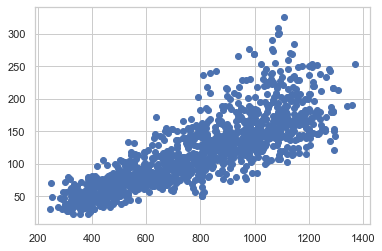

In [130]:
plt.scatter(df['Balls'],df['SO'])